In [43]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
from datetime import date
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.special import boxcox,inv_boxcox
from dateutil.relativedelta import relativedelta
import gc
import ast
from datetime import date, time
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('bikedata.csv')

In [3]:
# first we need to understanding the data.
df.head(10)

Date  Season  Hour  Holiday  Day of the Week  Working Day  \
0  1/1/2011       4     0        0                6            0   
1  1/1/2011       4     1        0                6            0   
2  1/1/2011       4     2        0                6            0   
3  1/1/2011       4     3        0                6            0   
4  1/1/2011       4     4        0                6            0   
5  1/1/2011       4     5        0                6            0   
6  1/1/2011       4     6        0                6            0   
7  1/1/2011       4     7        0                6            0   
8  1/1/2011       4     8        0                6            0   
9  1/1/2011       4     9        0                6            0   

   Weather Type  Temperature F  Temperature Feels F  Humidity  Wind Speed  \
0             1           36.6                 37.4        81           0   
1             1           34.9                 35.6        80           0   
2             1           34.9                 35.6        80           0   
3             1           36.6                 37.4        75           0   
4             1           36.6                 37.4        75           0   
5             2           36.6                 33.8        75           6   
6             1           34.9                 35.6        80           0   
7             1           33.1                 33.8        86           0   
8             1           36.6                 37.4        75           0   
9             1           43.5                 44.6        76           0   

   Casual Users  Registered Users  Total Users  
0             3                13           16  
1             8                32           40  
2             5                27           32  
3             3                10           13  
4             0                 1            1  
5             0                 1            1  
6             2                 0            2  
7             1                 2            3  
8             1                 7            8  
9             8                 6           14

#### ok let see first all the data is numerical data so let's explain some of it:
#### Season -->Seasons of the year -> 1=Spring 2=Summer 3=Fall 4=Winter
#### Weather Type --> Weather Type -> 1=Sunny 2=Cloudy 3=Windy 4=Rainy

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 17379 non-null  object 
 1   Season               17379 non-null  int64  
 2   Hour                 17379 non-null  int64  
 3   Holiday              17379 non-null  int64  
 4   Day of the Week      17379 non-null  int64  
 5   Working Day          17379 non-null  int64  
 6   Weather Type         17379 non-null  int64  
 7   Temperature F        17379 non-null  float64
 8   Temperature Feels F  17379 non-null  float64
 9   Humidity             17379 non-null  int64  
 10  Wind Speed           17379 non-null  int64  
 11  Casual Users         17379 non-null  int64  
 12  Registered Users     17379 non-null  int64  
 13  Total Users          17379 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.9+ MB


In [5]:
#change date type to date
df['Date']= pd.to_datetime(df['Date']) #format= '%m/%d/%Y'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 17379 non-null  datetime64[ns]
 1   Season               17379 non-null  int64         
 2   Hour                 17379 non-null  int64         
 3   Holiday              17379 non-null  int64         
 4   Day of the Week      17379 non-null  int64         
 5   Working Day          17379 non-null  int64         
 6   Weather Type         17379 non-null  int64         
 7   Temperature F        17379 non-null  float64       
 8   Temperature Feels F  17379 non-null  float64       
 9   Humidity             17379 non-null  int64         
 10  Wind Speed           17379 non-null  int64         
 11  Casual Users         17379 non-null  int64         
 12  Registered Users     17379 non-null  int64         
 13  Total Users          17379 non-

In [7]:
# change temperature F to C
df['Temperature F'] = 5/9*(df['Temperature F']-32)

In [8]:
#rename temperature F to C
df.rename(columns={'Temperature F': 'Temperature C'},inplace=True)

In [9]:
df['Temperature C'] = df['Temperature C'].round(1)

In [10]:
df.describe()

Season          Hour       Holiday  Day of the Week  \
count  17379.000000  17379.000000  17379.000000     17379.000000   
mean       2.485241     11.546752      0.028770         3.003683   
std        1.115985      6.914405      0.167165         2.005771   
min        1.000000      0.000000      0.000000         0.000000   
25%        1.000000      6.000000      0.000000         1.000000   
50%        2.000000     12.000000      0.000000         3.000000   
75%        3.000000     18.000000      0.000000         5.000000   
max        4.000000     23.000000      1.000000         6.000000   

        Working Day  Weather Type  Temperature C  Temperature Feels F  \
count  17379.000000  17379.000000   17379.000000         17379.000000   
mean       0.682721      1.425283      14.876063            59.722009   
std        0.465431      0.639357       9.239248            20.415345   
min        0.000000      1.000000      -8.000000             3.200000   
25%        0.000000      1.000000       7.300000            42.800000   
50%        1.000000      1.000000      15.000000            60.800000   
75%        1.000000      2.000000      22.700000            77.000000   
max        1.000000      4.000000      39.000000           122.000000   

           Humidity    Wind Speed  Casual Users  Registered Users  \
count  17379.000000  17379.000000  17379.000000      17379.000000   
mean      62.722884     12.736233     35.676218        153.786869   
std       19.292983      8.196891     49.305030        151.357286   
min        0.000000      0.000000      0.000000          0.000000   
25%       48.000000      7.000000      4.000000         34.000000   
50%       63.000000     13.000000     17.000000        115.000000   
75%       78.000000     17.000000     48.000000        220.000000   
max      100.000000     57.000000    367.000000        886.000000   

        Total Users  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [11]:
# let's drop unnecessary columns
df.drop(['Temperature Feels F'],axis ='columns',inplace=True)

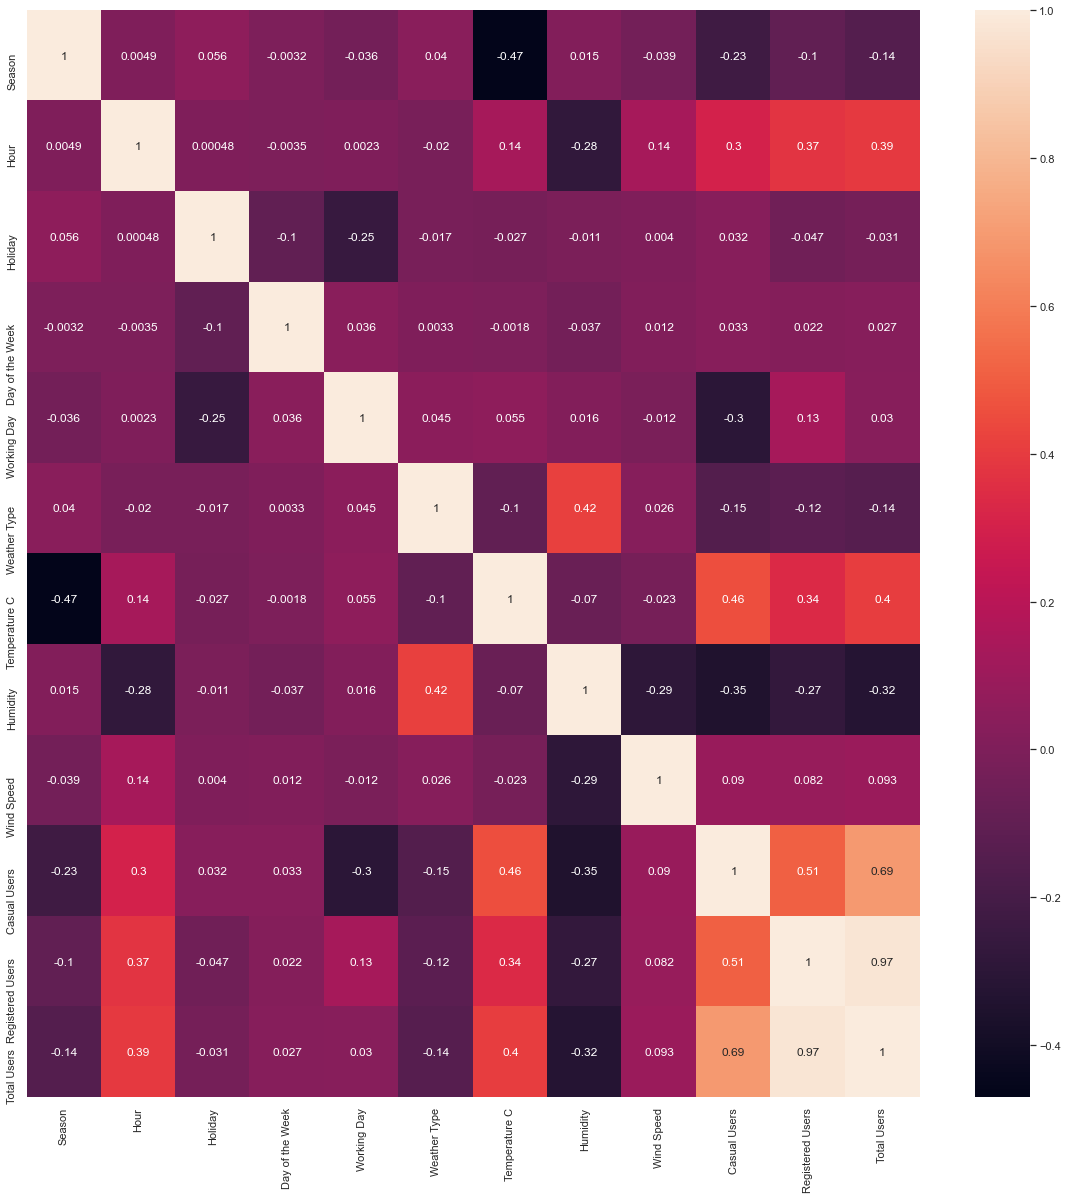

In [12]:
# so now there is no null value
# let's check outliers and relationships
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(),annot=True);

## The following questions will be answered in the Q4 of 2012 :

In [13]:
# sort data to Q4 of 2012
q4_2012= df.loc[(df['Date'] >= '10/01/2012')]
q4_2012.head()             

Date  Season  Hour  Holiday  Day of the Week  Working Day  \
15211 2012-10-01       3     0        0                1            1   
15212 2012-10-01       3     1        0                1            1   
15213 2012-10-01       3     2        0                1            1   
15214 2012-10-01       3     3        0                1            1   
15215 2012-10-01       3     4        0                1            1   

       Weather Type  Temperature C  Humidity  Wind Speed  Casual Users  \
15211             1           13.1        72           7             6   
15212             1           12.2        77           6             5   
15213             1           13.1        72           0             6   
15214             1           12.2        77           0             1   
15215             1           11.2        82           7             0   

       Registered Users  Total Users  
15211                39           45  
15212                13           18  
15213                 6           12  
15214                 6            7  
15215                10           10

### What are the most crowded days and what time was it ?

In [14]:
# sortdata by Total Users
sorted_data = q4_2012.sort_values(by=['Total Users'],ascending=False).head(10)
sorted_data

Date  Season  Hour  Holiday  Day of the Week  Working Day  \
15780 2012-10-24       3    17        0                3            1   
15444 2012-10-10       3    17        0                3            1   
15588 2012-10-16       3    17        0                2            1   
15756 2012-10-23       3    17        0                2            1   
15732 2012-10-22       3    17        0                1            1   
15276 2012-10-03       3    17        0                3            1   
15300 2012-10-04       3    17        0                4            1   
15324 2012-10-05       3    17        0                5            1   
15636 2012-10-18       3    17        0                4            1   
15612 2012-10-17       3    17        0                3            1   

       Weather Type  Temperature C  Humidity  Wind Speed  Casual Users  \
15780             1           22.7        47           0            87   
15444             1           18.8        43          15            91   
15588             1           16.0        39          13           104   
15756             1           23.7        41           0            67   
15732             1           20.8        33           7            84   
15276             1           24.6        65           0            84   
15300             1           24.6        51          15           112   
15324             1           24.6        42          11           158   
15636             2           18.8        64          22           102   
15612             1           16.9        56           7           122   

       Registered Users  Total Users  
15780               876          963  
15444               857          948  
15588               839          943  
15756               871          938  
15732               838          922  
15276               833          917  
15300               789          901  
15324               742          900  
15636               788          890  
15612               766          888

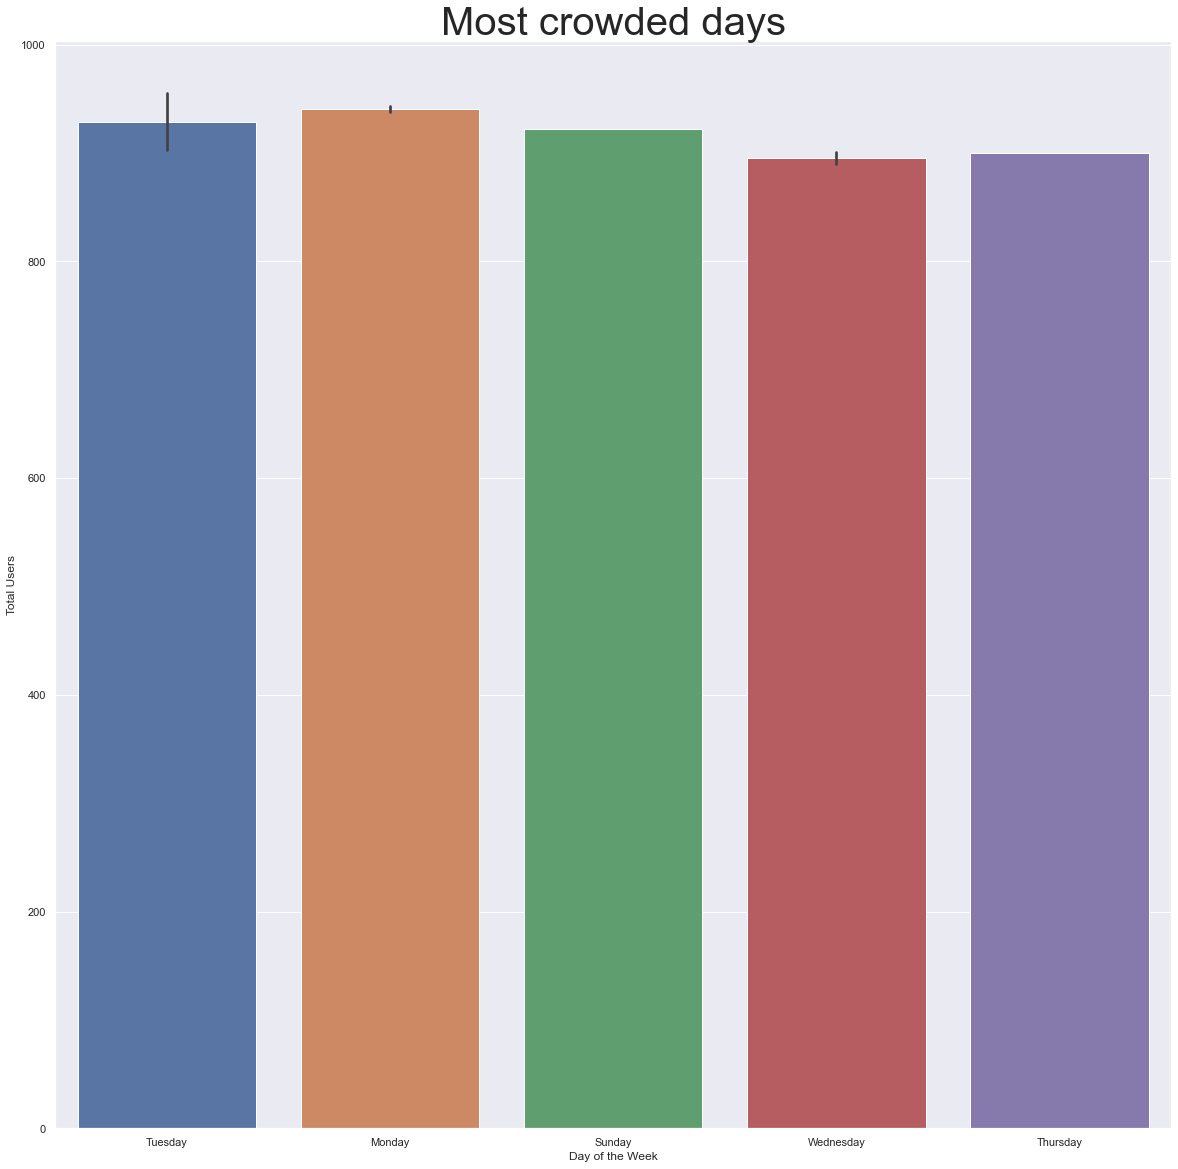

In [15]:
# change value Day of the Week for numerical to their names.
sorted_data.replace({'Day of the Week' : { 1 : 'Sunday', 2 : 'Monday', 3 : 'Tuesday',4 : 'Wednesday' ,5 : 'Thursday' ,6: 'Friday' ,0: 'Saturday'}},inplace=True)
# visualize.
temp = sns.barplot(x = 'Day of the Week',y = 'Total Users',data = sorted_data).axes.set_title("Most crowded days",fontsize=40)

## What is the difference between registered and casual users?

In [16]:
# calculate the sum of Casual Users and Registered Users
C = q4_2012['Casual Users'].sum()
R = q4_2012['Registered Users'].sum()
# visualize
data = [R, C]
labels = ['Registered Users', 'Casual Users']
fig = px.bar(x=labels, y=data , title= 'The difference between registered and casual users')
fig.update_traces(marker_color='SlateBlue')
fig.show()

## How does the season affect the number of users?

In [50]:
#sort data
Season_3 = q4_2012[q4_2012['Season'] == 3]
Season_4 = q4_2012[q4_2012['Season'] == 4]
Season_3_sum = Season_3['Total Users'].sum() 
Season_4_sum = Season_4['Total Users'].sum()
# visualize
data = [Season_3_sum, Season_4_sum]
labels = ['Fall', 'Winter']
fig = go.Figure(data=[go.Pie(labels=labels, values=data, pull=[0, 0.1])])
fig.show()

## Did the low temperature in winter affect the registered users and casual users?

In [18]:
#sort data
sorted_temperature = Season_4.sort_values(by=['Temperature C'],ascending=True)
# visualize
#sns.barplot(x="Temperature C", y="Registered Users", data=sorted_temperature);
R = px.bar(sorted_temperature, x='Temperature C', y='Registered Users', color_discrete_sequence=px.colors.qualitative.Dark24, title='Low temperature and registered users')
C = px.bar(sorted_temperature, x='Temperature C', y='Casual Users',color_discrete_sequence=px.colors.qualitative.Dark24,title='Low temperature and casual users')
R.show()
C.show()

## Predict the total users that depends on time.

### ok this dataset is time series data so we need to handle with somethings first:

In [19]:
# create new column that have date and time.

new_times =[]

# credit by abdulkareem

for i,e in enumerate(df['Date'].to_list()):
     year = df['Date'][i].year
     month = df['Date'][i].month
     day = df['Date'][i].day
     hour = df['Hour'][i]
    
     date_time = pd.Timestamp(year, month, day, hour)
     new_times.append(date_time)
df['new_date'] = pd.Series(new_times)

In [20]:
# set new_time as index.
df.set_index('new_date',inplace=True)

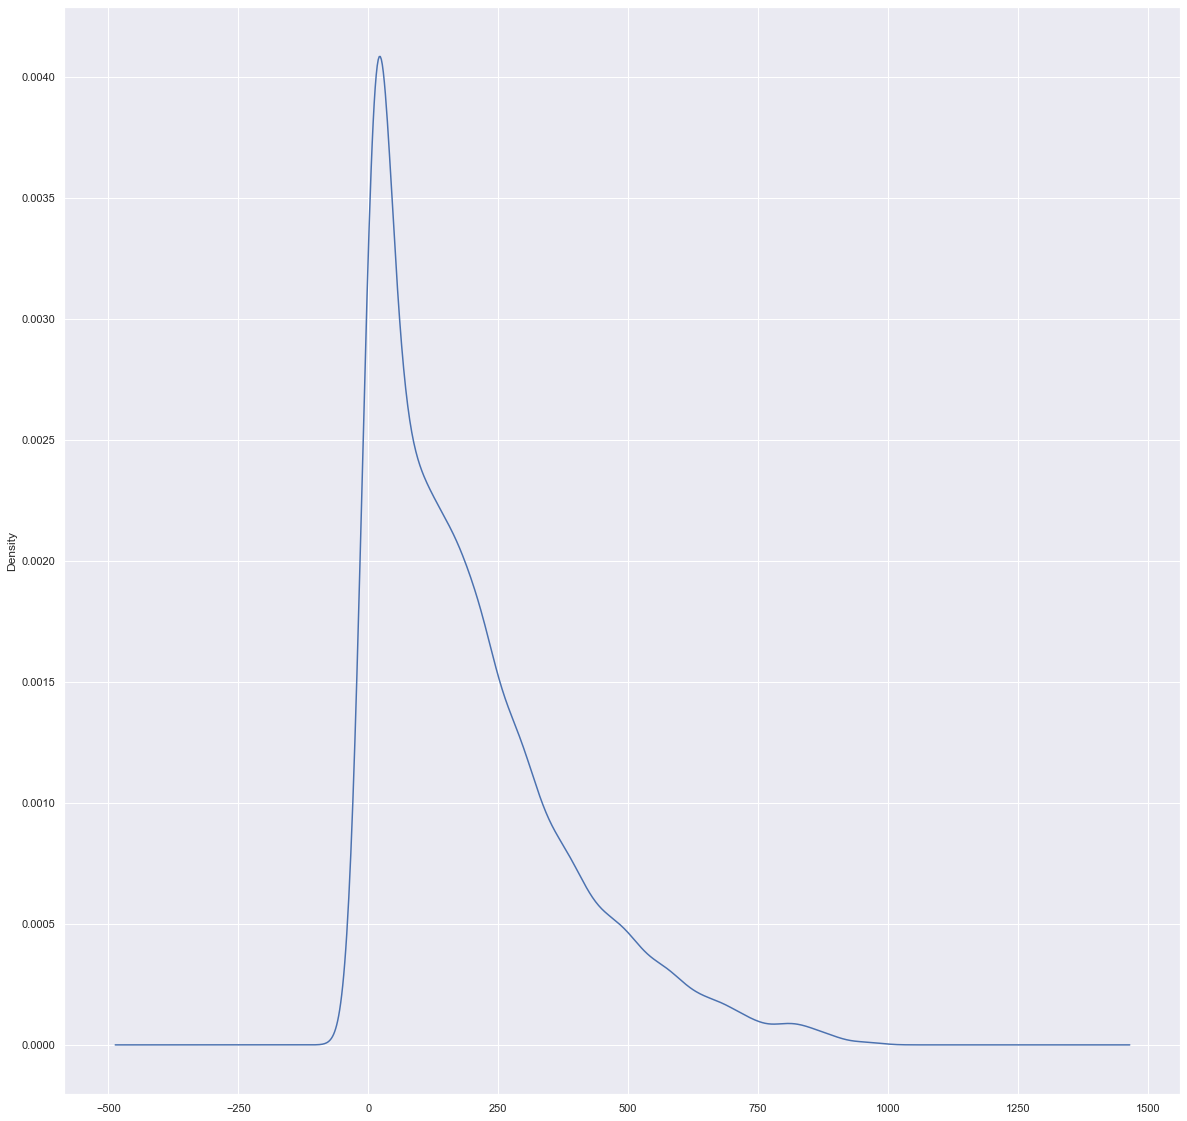

In [21]:
# check kde
df['Total Users'].plot.kde();

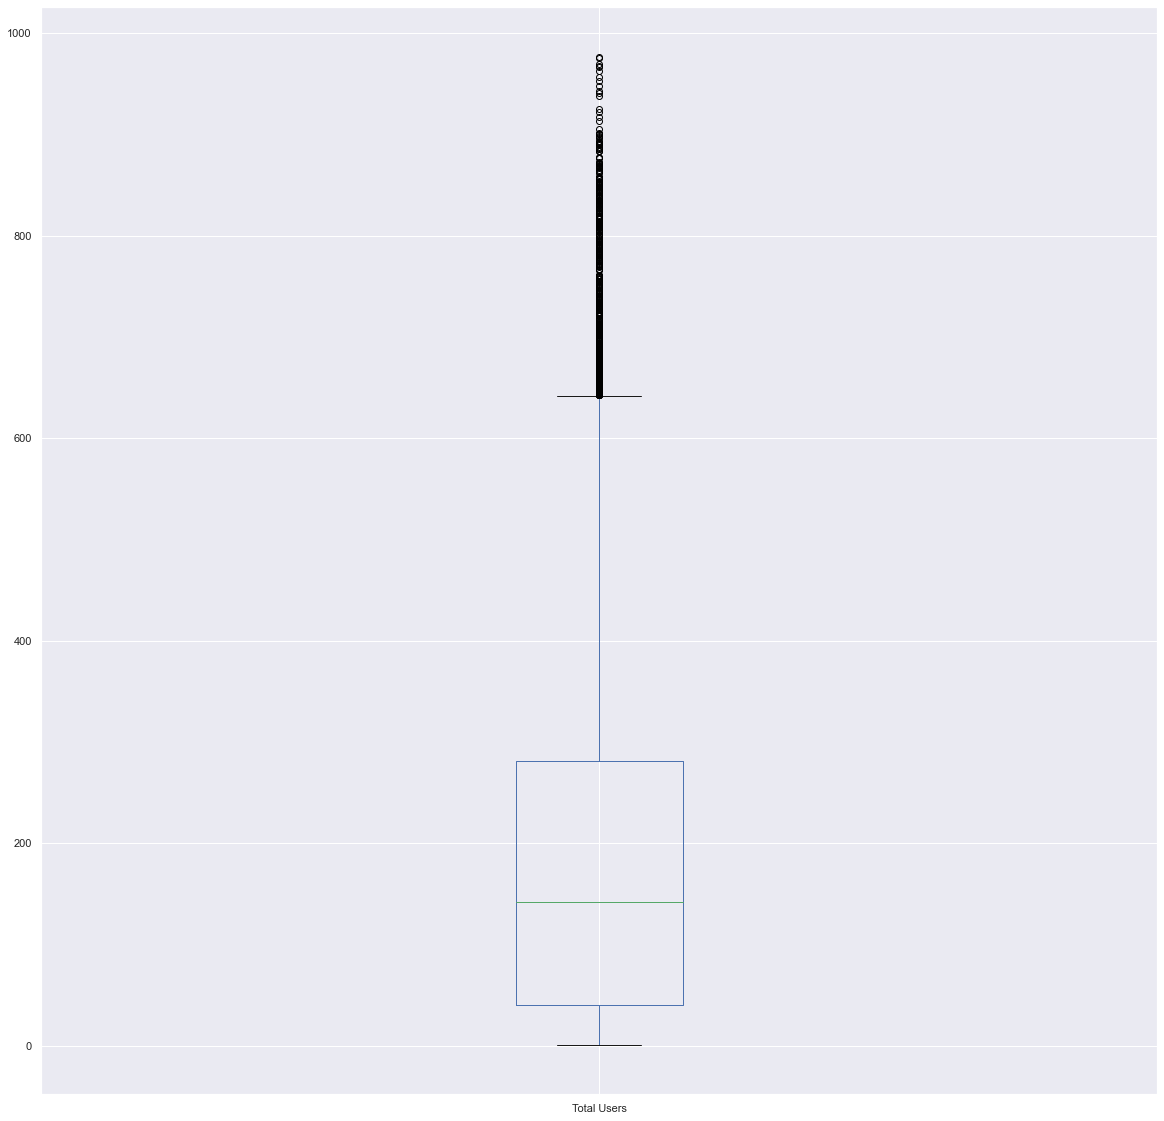

In [22]:
# check outliers
df['Total Users'].plot(kind='box');

In [23]:
df['Total Users'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: Total Users, dtype: float64

In [24]:
# check value that over than 600
df[df['Total Users']>600].value_counts()

Date        Season  Hour  Holiday  Day of the Week  Working Day  Weather Type  Temperature C  Humidity  Wind Speed  Casual Users  Registered Users  Total Users
2011-05-10  1       17    0        2                1            1             21.7           33        0           79            532               611            1
2012-09-08  3       12    0        6                0            1             29.4           55        33          220           474               694            1
                    14    0        6                0            1             30.4           52        30          260           366               626            1
2012-09-09  3       12    0        0                0            1             22.7           47        0           247           510               757            1
                    13    0        0                0            1             23.7           39        0           238           491               729            1
               

In [25]:
# check handle outliers
df.loc[df['Total Users']>600,'Total Users']=600
df.loc[df['Registered Users']>450,'Registered Users']=450
df.loc[df['Casual Users']>100,'Casual Users']=100

In [26]:
df.describe( )

Season          Hour       Holiday  Day of the Week  \
count  17379.000000  17379.000000  17379.000000     17379.000000   
mean       2.485241     11.546752      0.028770         3.003683   
std        1.115985      6.914405      0.167165         2.005771   
min        1.000000      0.000000      0.000000         0.000000   
25%        1.000000      6.000000      0.000000         1.000000   
50%        2.000000     12.000000      0.000000         3.000000   
75%        3.000000     18.000000      0.000000         5.000000   
max        4.000000     23.000000      1.000000         6.000000   

        Working Day  Weather Type  Temperature C      Humidity    Wind Speed  \
count  17379.000000  17379.000000   17379.000000  17379.000000  17379.000000   
mean       0.682721      1.425283      14.876063     62.722884     12.736233   
std        0.465431      0.639357       9.239248     19.292983      8.196891   
min        0.000000      1.000000      -8.000000      0.000000      0.000000   
25%        0.000000      1.000000       7.300000     48.000000      7.000000   
50%        1.000000      1.000000      15.000000     63.000000     13.000000   
75%        1.000000      2.000000      22.700000     78.000000     17.000000   
max        1.000000      4.000000      39.000000    100.000000     57.000000   

       Casual Users  Registered Users   Total Users  
count  17379.000000      17379.000000  17379.000000  
mean      30.064848        146.343978    184.934806  
std       32.332898        129.697346    168.286288  
min        0.000000          0.000000      1.000000  
25%        4.000000         34.000000     40.000000  
50%       17.000000        115.000000    142.000000  
75%       48.000000        220.000000    281.000000  
max      100.000000        450.000000    600.000000

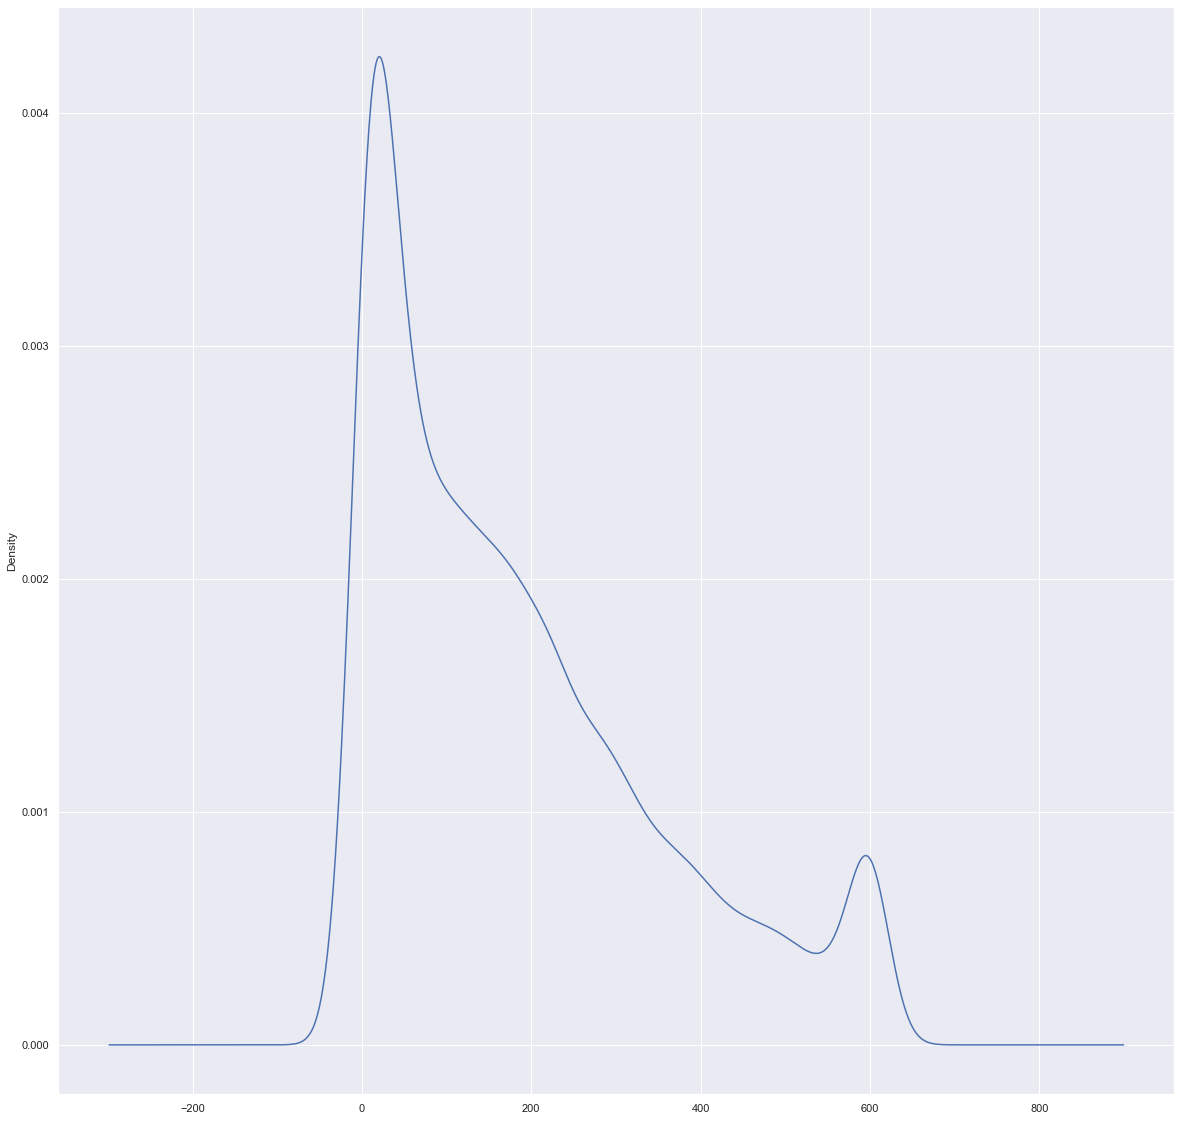

In [27]:
#  check kde after outliers
df['Total Users'].plot.kde();

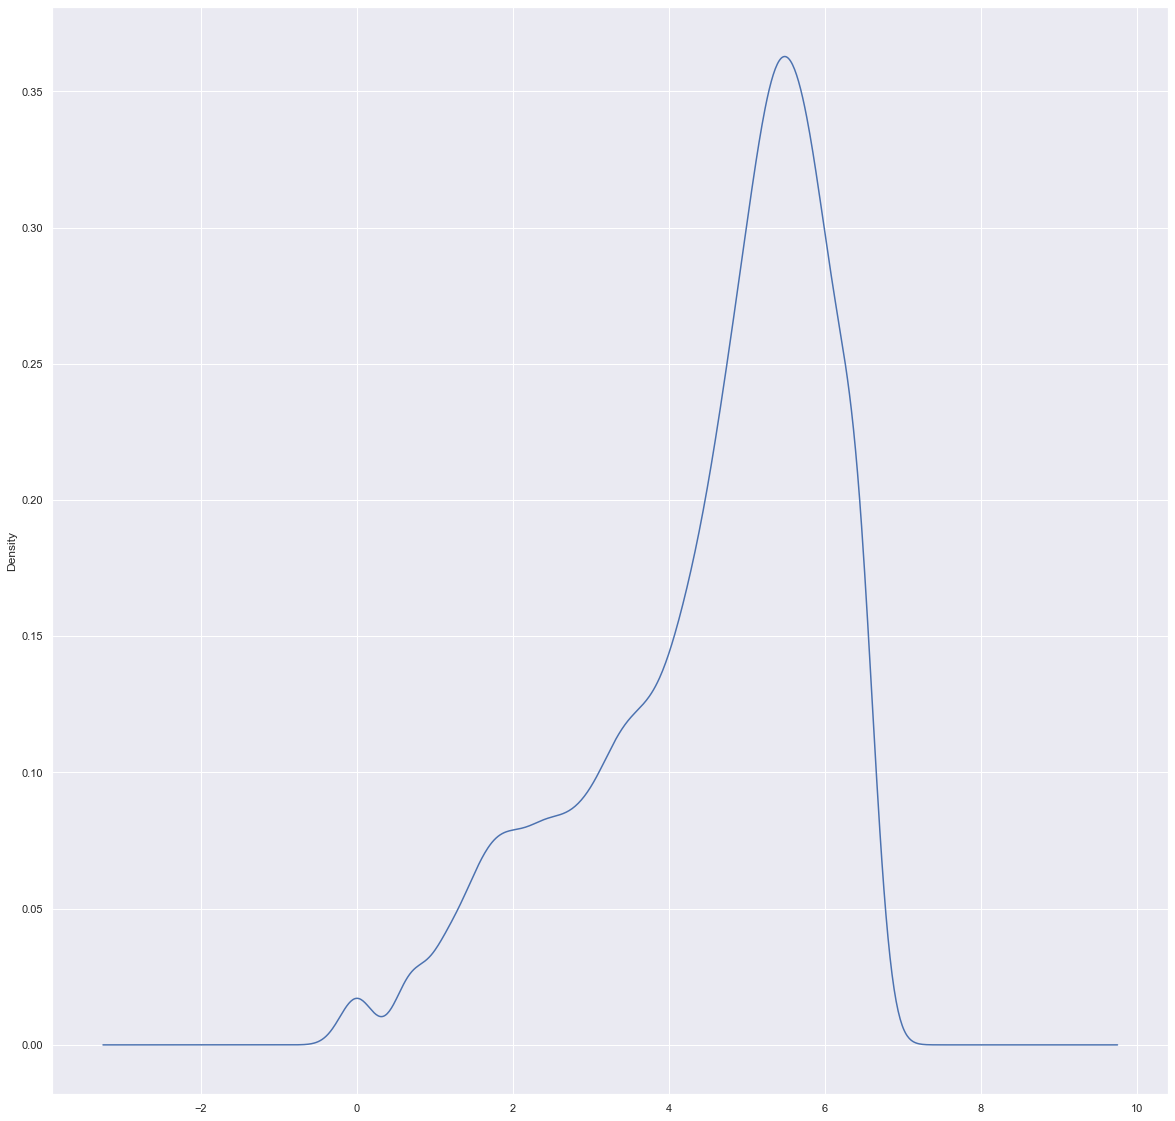

In [28]:
# apply boxcox
df_TU=df['Total Users']
df_TU=boxcox(np.array(df_TU).reshape(-1,1),0.005) ###lamda don't forget
df['Total_Users_box-cox']=df_TU
df['Total_Users_box-cox'].plot.kde();

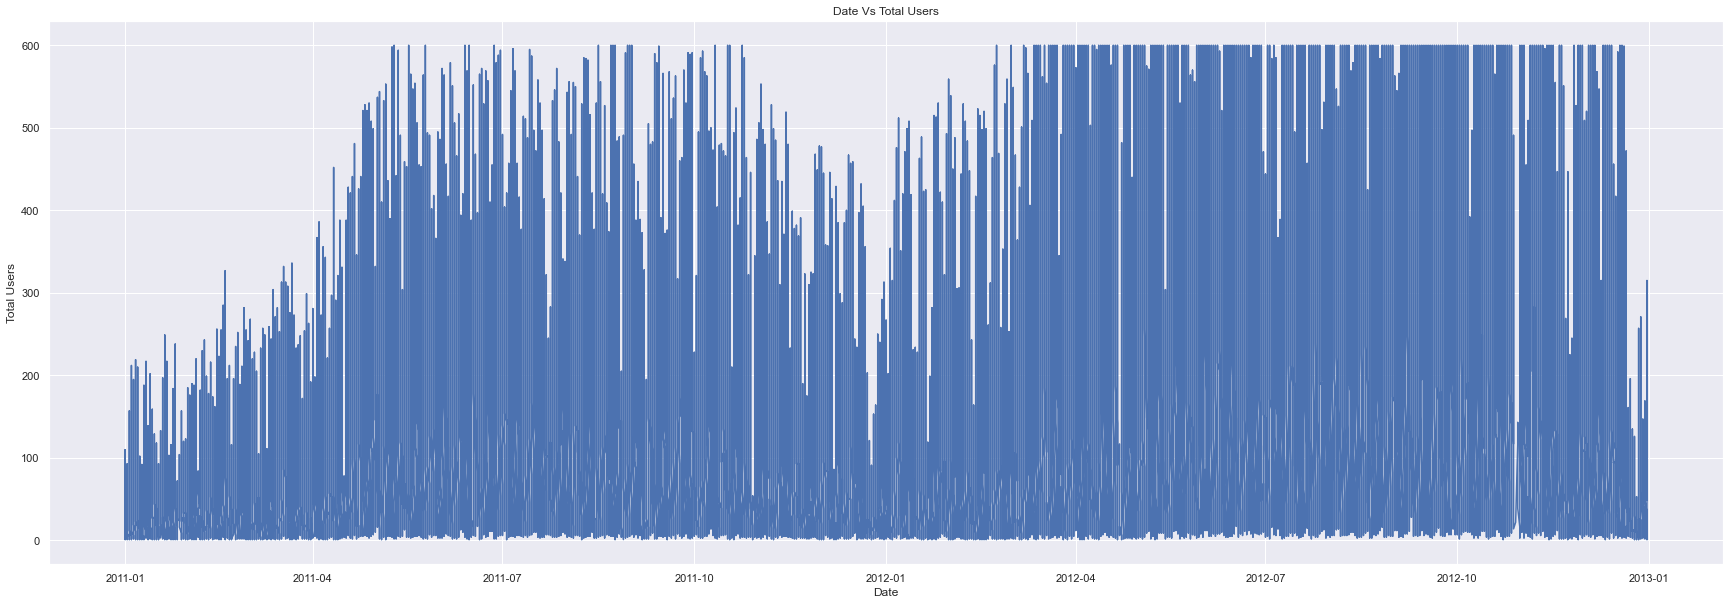

In [29]:
# plot Date Vs Total Users
plt.figure(figsize=(30,10))
plt.plot(df['Date'],df['Total Users'])
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.title('Date Vs Total Users')
plt.show()

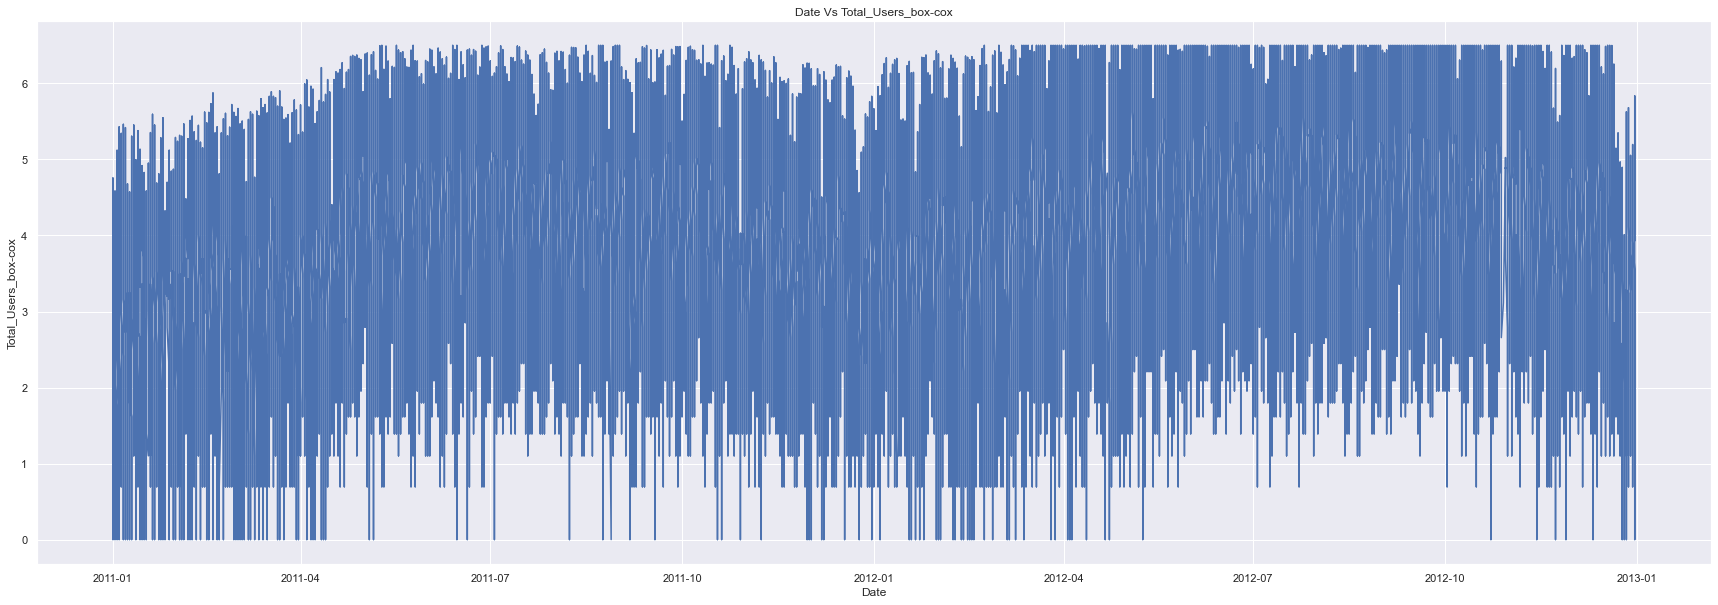

In [30]:
# plot Date Vs Total_Users_box-cox
plt.figure(figsize=(30,10))
plt.plot(df["Date"],df['Total_Users_box-cox'])
plt.xlabel('Date')
plt.ylabel('Total_Users_box-cox')
plt.title('Date Vs Total_Users_box-cox')
plt.show()

### how dose the split work?
#### we divided number of rows(17378) by number of months (24 = 2 years)
#### so the nerest date that i can choice is 2012-07-31 .

In [31]:
df

Date  Season  Hour  Holiday  Day of the Week  \
new_date                                                                 
2011-01-01 00:00:00 2011-01-01       4     0        0                6   
2011-01-01 01:00:00 2011-01-01       4     1        0                6   
2011-01-01 02:00:00 2011-01-01       4     2        0                6   
2011-01-01 03:00:00 2011-01-01       4     3        0                6   
2011-01-01 04:00:00 2011-01-01       4     4        0                6   
...                        ...     ...   ...      ...              ...   
2012-12-31 19:00:00 2012-12-31       4    19        0                1   
2012-12-31 20:00:00 2012-12-31       4    20        0                1   
2012-12-31 21:00:00 2012-12-31       4    21        0                1   
2012-12-31 22:00:00 2012-12-31       4    22        0                1   
2012-12-31 23:00:00 2012-12-31       4    23        0                1   

                     Working Day  Weather Type  Temperature C  Humidity  \
new_date                                                                  
2011-01-01 00:00:00            0             1            2.6        81   
2011-01-01 01:00:00            0             1            1.6        80   
2011-01-01 02:00:00            0             1            1.6        80   
2011-01-01 03:00:00            0             1            2.6        75   
2011-01-01 04:00:00            0             1            2.6        75   
...                          ...           ...            ...       ...   
2012-12-31 19:00:00            1             2            3.5        60   
2012-12-31 20:00:00            1             2            3.5        60   
2012-12-31 21:00:00            1             1            3.5        60   
2012-12-31 22:00:00            1             1            3.5        56   
2012-12-31 23:00:00            1             1            3.5        65   

                     Wind Speed  Casual Users  Registered Users  Total Users  \
new_date                                                                       
2011-01-01 00:00:00           0             3                13           16   
2011-01-01 01:00:00           0             8                32           40   
2011-01-01 02:00:00           0             5                27           32   
2011-01-01 03:00:00           0             3                10           13   
2011-01-01 04:00:00           0             0                 1            1   
...                         ...           ...               ...          ...   
2012-12-31 19:00:00          11            11               108          119   
2012-12-31 20:00:00          11             8                81           89   
2012-12-31 21:00:00          11             7                83           90   
2012-12-31 22:00:00           9            13                48           61   
2012-12-31 23:00:00           9            12                37           49   

                     Total_Users_box-cox  
new_date                                  
2011-01-01 00:00:00             2.791896  
2011-01-01 01:00:00             3.723109  
2011-01-01 02:00:00             3.495938  
2011-01-01 03:00:00             2.581467  
2011-01-01 04:00:00             0.000000  
...                                  ...  
2012-12-31 19:00:00             4.836681  
2012-12-31 20:00:00             4.539385  
2012-12-31 21:00:00             4.550812  
2012-12-31 22:00:00             4.153413  
2012-12-31 23:00:00             3.929933  

[17379 rows x 14 columns]

In [32]:
# we will take only date and Total_Users_box-cox
df_sorted = df.iloc[:,13]
df_sorted.head()

new_date
2011-01-01 00:00:00    2.791896
2011-01-01 01:00:00    3.723109
2011-01-01 02:00:00    3.495938
2011-01-01 03:00:00    2.581467
2011-01-01 04:00:00    0.000000
Name: Total_Users_box-cox, dtype: float64

In [33]:
# split train and test
split_date = '2012-07-31'
ts_train = df_sorted.loc[df_sorted.index <= split_date].copy()
ts_test = df_sorted.loc[df_sorted.index > split_date].copy()

In [34]:
# let's check len
len(ts_train),len(ts_test)

(13724, 3655)

#### right now we want know does the mean is CONSTANT with time or not???

In [35]:
# here we want to know if the mean is constant with time or not
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(168).mean() # we take window size 168 at a time and apply mean value
    #Plot rolling statistics:
    plt.figure(figsize=(30,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False) # ensure all fig windos are displayed

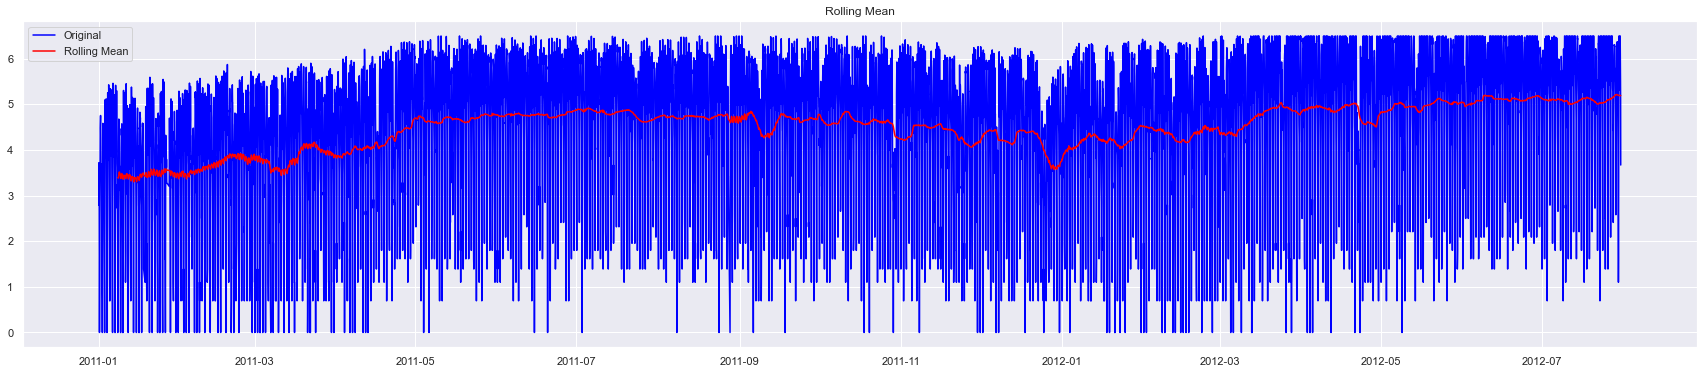

In [36]:
test_stationarity(ts_train)

In [37]:
# ACF and PACF plots
lag = 168
lag_pacf = pacf(ts_train, nlags=lag, method='ols')
lag_acf = acf(ts_train, nlags=lag)

C:\Users\gassa\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



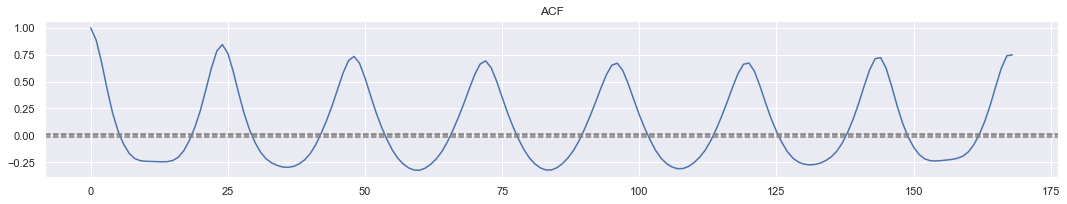

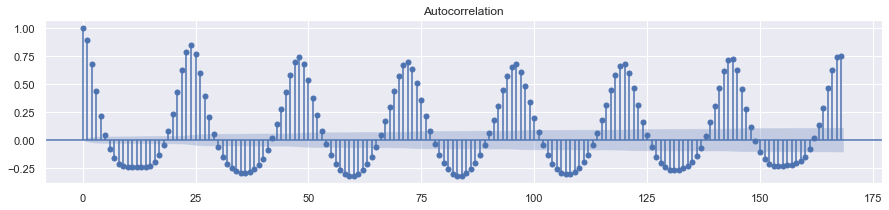

In [38]:
#Plot ACF auto corrletion function to select q value
plt.figure(figsize=(15,3))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_sorted)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_sorted)),linestyle='--',color='gray')
plt.title('ACF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_acf(ts_train, ax=plt.gca(),lags=lag)#gca used to get the current axes instance of the current figure matching
plt.show()

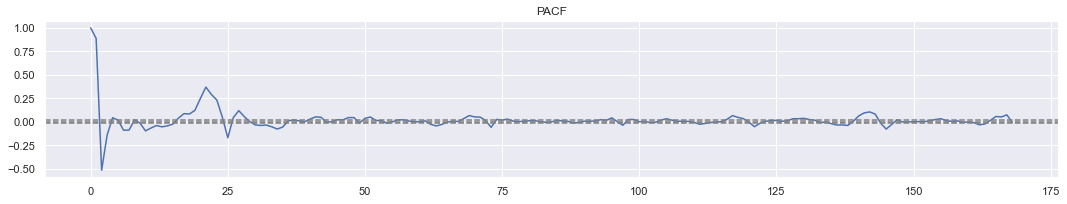

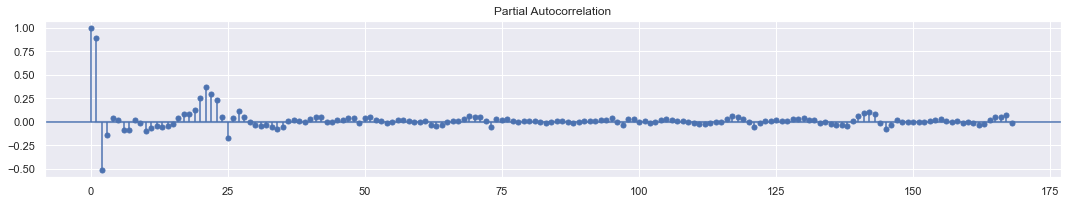

In [39]:
#Plot PACF partial auto corrletion function to select p value
plt.figure(figsize=(15,3))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_sorted)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_sorted)),linestyle='--',color='gray')
plt.title('PACF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_pacf(ts_train, ax=plt.gca(), lags=lag)
plt.tight_layout()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 17379 non-null  datetime64[ns]
 1   Season               17379 non-null  int64         
 2   Hour                 17379 non-null  int64         
 3   Holiday              17379 non-null  int64         
 4   Day of the Week      17379 non-null  int64         
 5   Working Day          17379 non-null  int64         
 6   Weather Type         17379 non-null  int64         
 7   Temperature C        17379 non-null  float64       
 8   Humidity             17379 non-null  int64         
 9   Wind Speed           17379 non-null  int64         
 10  Casual Users         17379 non-null  int64         
 11  Registered Users     17379 non-null  int64         
 12  Total Users          17379 non-null  int64         
 

In [41]:
p=3 # PACF
q=12 # ACF
d=1

C:\Users\gassa\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\gassa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

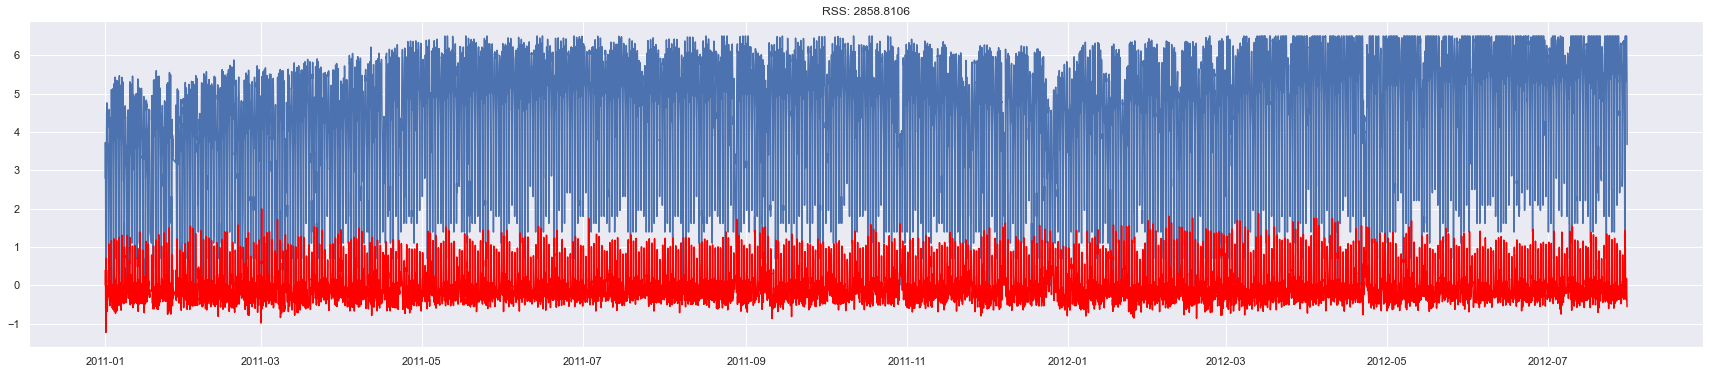

In [42]:
# apply ARIMA model
model = ARIMA(ts_train, order=(p, d, q))  
results_ARIMA = model.fit(disp=1)
plt.figure(figsize=(30,6))
plt.plot(ts_train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues).dropna()**2))
plt.show()

In [51]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.Total_Users_box-cox   No. Observations:                13723
Model:                   ARIMA(3, 1, 12)   Log Likelihood              -11483.154
Method:                          css-mle   S.D. of innovations              0.559
Date:                   Sat, 04 Dec 2021   AIC                          23000.308
Time:                           15:46:26   BIC                          23128.264
Sample:                                1   HQIC                         23042.948
                                                                                 
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0001      0.000      1.216      0.224   -8.34e-05       0.000
ar.L1.D.Total_Users_box-cox      2.1193      0.026     80.830      0.000       2.068       2.171
ar.L2.D.Total_Users_box-cox     -1.7941      0.041    -43.613      0.000      -1.875      -1.714
ar.L3.D.Total_Users_box-cox      0.5493      0.022     24.720      0.000       0.506       0.593
ma.L1.D.Total_Users_box-cox     -1.9267      0.027    -71.641      0.000      -1.979      -1.874
ma.L2.D.Total_Users_box-cox      1.3650      0.040     33.937      0.000       1.286       1.444
ma.L3.D.Total_Users_box-cox     -0.4339      0.026    -16.941      0.000      -0.484      -0.384
ma.L4.D.Total_Users_box-cox      0.0458      0.022      2.053      0.040       0.002       0.089
ma.L5.D.Total_Users_box-cox      0.0549      0.022      2.462      0.014       0.011       0.099
ma.L6.D.Total_Users_box-cox     -0.0783      0.023     -3.444      0.001      -0.123      -0.034
ma.L7.D.Total_Users_box-cox     -0.1599      0.022     -7.170      0.000      -0.204      -0.116
ma.L8.D.Total_Users_box-cox      0.0553      0.023      2.449      0.014       0.011       0.099
ma.L9.D.Total_Users_box-cox      0.0426      0.022      1.908      0.056      -0.001       0.086
ma.L10.D.Total_Users_box-cox    -0.0325      0.022     -1.450      0.147      -0.076       0.011
ma.L11.D.Total_Users_box-cox    -0.0014      0.021     -0.069      0.945      -0.042       0.039
ma.L12.D.Total_Users_box-cox     0.0724      0.011      6.771      0.000       0.051       0.093
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8786           -0.6591j            1.0984           -0.1024
AR.2             0.8786           +0.6591j            1.0984            0.1024
AR.3             1.5090           -0.0000j            1.5090           -0.0000
MA.1             0.8014           -0.6194j            1.0129           -0.1047
MA.2             0.8014           +0.6194j            1.0129            0.1047
MA.3             1.0120           -0.0000j            1.0120           -0.0000
MA.4             1.0652           -0.0000j            1.0652           -0.0000
MA.5             0.6253           -1.1749j            1.3309           -0.1722
MA.6             0.6253           +1.1749j            1.3309            0.1722
MA.7            -0.0656           -1.2181j            1.2199           -0.2586
MA.8            -0.0656           +1.2181j            1.2199            0.2586
MA.9            -0.9571           -1.0855j            1.4472           -0.3650
MA.10           -0.9571           +1.0855j            1.4472            0.3650
MA.11           -1.4327     

In [52]:
# define function to get perdiction for forecasting
def StartARIMAForecasting(Actual, p, d, q):
    model = ARIMA(Actual, order=(p, d, q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [53]:
#new arrays to store actual and predictions
Actual = [x for x in ts_train]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(ts_test)):
    ActualValue =  ts_test[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)  
 
predictions=pd.DataFrame(Predictions).set_index(ts_test.index)

C:\Users\gassa\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




Actual=3.067813, Predicted=3.101239
Actual=2.090289, Predicted=2.807835
Actual=1.799809, Predicted=1.910730
Actual=1.799809, Predicted=1.735429
Actual=3.843120, Predicted=1.980217
Actual=5.337847, Predicted=4.795211
Actual=6.338649, Predicted=6.116176
Actual=6.500331, Predicted=6.452871
Actual=5.893301, Predicted=6.328890
Actual=5.499195, Predicted=5.434645
Actual=5.485526, Predicted=5.257159
Actual=5.590127, Predicted=5.578960
Actual=5.743895, Predicted=5.715247
Actual=5.638706, Predicted=5.820478
Actual=5.032076, Predicted=5.581027
Actual=6.087251, Predicted=4.729310
Actual=6.500331, Predicted=6.533099
Actual=6.500331, Predicted=6.868667
Actual=6.500331, Predicted=6.311547
Actual=6.208084, Predicted=6.416726
Actual=5.950433, Predicted=6.080539
Actual=5.626774, Predicted=5.820194
Actual=5.053215, Predicted=5.529081
Actual=3.887446, Predicted=4.835187
Actual=3.527250, Predicted=3.408532
Actual=2.581467, Predicted=3.415197
Actual=1.955407, Predicted=2.382538
Actual=1.391110, Predicted=1

Actual=5.718584, Predicted=5.861876
Actual=5.585973, Predicted=5.679291
Actual=5.666024, Predicted=5.515392
Actual=6.125003, Predicted=5.690308
Actual=6.500331, Predicted=6.359129
Actual=6.500331, Predicted=6.677322
Actual=6.500331, Predicted=6.429607
Actual=6.265757, Predicted=6.423808
Actual=5.902534, Predicted=6.162770
Actual=5.634744, Predicted=5.728612
Actual=5.114149, Predicted=5.542907
Actual=4.492362, Predicted=4.943185
Actual=3.748263, Predicted=4.241877
Actual=3.018281, Predicted=3.489397
Actual=2.209338, Predicted=2.778757
Actual=1.955407, Predicted=1.960817
Actual=3.527250, Predicted=1.943425
Actual=3.820217, Predicted=4.369090
Actual=4.950628, Predicted=4.097029
Actual=4.836681, Predicted=5.144435
Actual=5.467014, Predicted=4.796080
Actual=5.332541, Predicted=5.506007
Actual=5.602487, Predicted=5.335671
Actual=5.836102, Predicted=5.584039
Actual=5.751015, Predicted=5.983162
Actual=5.809628, Predicted=5.672895
Actual=5.865097, Predicted=5.782535
Actual=6.241748, Predicted=5

Actual=4.836681, Predicted=4.781851
Actual=4.047749, Predicted=4.819064
Actual=3.284779, Predicted=3.768608
Actual=2.412328, Predicted=2.919670
Actual=3.018281, Predicted=2.142182
Actual=3.748263, Predicted=3.388600
Actual=4.878839, Predicted=4.287091
Actual=5.677514, Predicted=5.298493
Actual=6.144589, Predicted=5.950015
Actual=5.685104, Predicted=6.167947
Actual=5.779012, Predicted=5.347098
Actual=5.152858, Predicted=5.696262
Actual=5.067070, Predicted=4.976935
Actual=5.700118, Predicted=4.971321
Actual=5.962069, Predicted=6.103116
Actual=5.923763, Predicted=6.134601
Actual=6.021100, Predicted=5.793105
Actual=5.917742, Predicted=6.008055
Actual=5.692638, Predicted=5.886198
Actual=5.316458, Predicted=5.567083
Actual=4.066133, Predicted=5.157935
Actual=3.865523, Predicted=3.537368
Actual=3.284779, Predicted=3.777170
Actual=2.315891, Predicted=3.273129
Actual=1.615931, Predicted=1.893558
Actual=1.101635, Predicted=1.366323
Actual=1.955407, Predicted=1.030246
Actual=3.643712, Predicted=2

Actual=5.602487, Predicted=5.735272
Actual=5.842616, Predicted=5.472444
Actual=6.270063, Predicted=5.947357
Actual=6.500331, Predicted=6.503769
Actual=6.500331, Predicted=6.579257
Actual=6.495156, Predicted=6.426454
Actual=6.168562, Predicted=6.445633
Actual=5.832829, Predicted=6.023433
Actual=5.448164, Predicted=5.665184
Actual=4.746802, Predicted=5.324436
Actual=3.887446, Predicted=4.481302
Actual=2.656546, Predicted=3.542549
Actual=1.799809, Predicted=2.202081
Actual=2.209338, Predicted=1.521399
Actual=2.315891, Predicted=2.592852
Actual=3.723109, Predicted=2.564542
Actual=5.266647, Predicted=4.270281
Actual=6.417990, Predicted=6.016265
Actual=6.500331, Predicted=6.733720
Actual=5.938664, Predicted=6.288913
Actual=5.249494, Predicted=5.456790
Actual=5.610646, Predicted=4.892222
Actual=5.973576, Predicted=5.845316
Actual=5.785894, Predicted=6.299104
Actual=5.789318, Predicted=5.650218
Actual=5.908644, Predicted=5.704823
Actual=6.297626, Predicted=6.000756
Actual=6.500331, Predicted=6

Actual=2.412328, Predicted=2.869210
Actual=2.209338, Predicted=2.019563
Actual=2.090289, Predicted=2.311801
Actual=3.723109, Predicted=2.228176
Actual=5.003198, Predicted=4.486477
Actual=6.282876, Predicted=5.697855
Actual=6.500331, Predicted=6.593760
Actual=5.926761, Predicted=6.410059
Actual=5.485526, Predicted=5.419098
Actual=5.772083, Predicted=5.209048
Actual=5.861915, Predicted=5.992247
Actual=5.956267, Predicted=6.010831
Actual=5.610646, Predicted=5.944676
Actual=5.887100, Predicted=5.443658
Actual=6.248351, Predicted=5.970251
Actual=6.500331, Predicted=6.498018
Actual=6.500331, Predicted=6.577598
Actual=6.443749, Predicted=6.440982
Actual=6.058664, Predicted=6.366547
Actual=5.789318, Predicted=5.883566
Actual=5.782459, Predicted=5.657738
Actual=5.590127, Predicted=5.843024
Actual=5.073929, Predicted=5.559791
Actual=4.819322, Predicted=4.833483
Actual=4.391320, Predicted=4.714457
Actual=3.796789, Predicted=4.291858
Actual=2.412328, Predicted=3.558337
Actual=2.726467, Predicted=1

Actual=6.500331, Predicted=6.476842
Actual=6.423564, Predicted=6.485442
Actual=6.493425, Predicted=6.389448
Actual=6.447377, Predicted=6.520255
Actual=6.272210, Predicted=6.447054
Actual=6.089811, Predicted=6.176894
Actual=5.865097, Predicted=6.007447
Actual=5.321847, Predicted=5.790047
Actual=4.903329, Predicted=5.103304
Actual=4.595292, Predicted=4.730137
Actual=3.843120, Predicted=4.544781
Actual=3.067813, Predicted=3.574828
Actual=2.581467, Predicted=2.739596
Actual=1.955407, Predicted=2.472772
Actual=2.412328, Predicted=1.806291
Actual=3.843120, Predicted=2.679484
Actual=5.165444, Predicted=4.639946
Actual=6.295532, Predicted=5.748613
Actual=6.500331, Predicted=6.585134
Actual=5.782459, Predicted=6.386750
Actual=5.379339, Predicted=5.240013
Actual=5.606575, Predicted=5.113695
Actual=5.768601, Predicted=5.832646
Actual=5.923763, Predicted=5.938221
Actual=5.890205, Predicted=5.956115
Actual=5.908644, Predicted=5.851178
Actual=6.210363, Predicted=5.882992
Actual=6.500331, Predicted=6

Actual=2.853376, Predicted=3.332213
Actual=2.315891, Predicted=2.779713
Actual=2.656546, Predicted=2.109705
Actual=3.615816, Predicted=2.889541
Actual=5.272302, Predicted=4.178492
Actual=6.376173, Predicted=6.003624
Actual=6.500331, Predicted=6.773118
Actual=5.896388, Predicted=6.279264
Actual=5.289083, Predicted=5.403758
Actual=5.499195, Predicted=4.954333
Actual=5.839364, Predicted=5.682524
Actual=5.914718, Predicted=6.130925
Actual=5.703838, Predicted=5.925598
Actual=5.785894, Predicted=5.543249
Actual=6.243953, Predicted=5.794650
Actual=6.500331, Predicted=6.498583
Actual=6.500331, Predicted=6.626182
Actual=6.500331, Predicted=6.420941
Actual=6.166190, Predicted=6.447381
Actual=5.973576, Predicted=6.016261
Actual=5.443397, Predicted=5.867177
Actual=4.801666, Predicted=5.263087
Actual=4.218256, Predicted=4.521587
Actual=3.067813, Predicted=4.027630
Actual=2.791896, Predicted=2.648875
Actual=1.955407, Predicted=2.719802
Actual=2.090289, Predicted=1.801425
Actual=4.233846, Predicted=2

Actual=6.248351, Predicted=5.956628
Actual=6.500331, Predicted=6.341049
Actual=6.500331, Predicted=6.636602
Actual=6.500331, Predicted=6.481084
Actual=6.312169, Predicted=6.448105
Actual=6.007348, Predicted=6.227544
Actual=5.666024, Predicted=5.858814
Actual=5.654405, Predicted=5.533158
Actual=5.208325, Predicted=5.692247
Actual=5.321847, Predicted=5.077704
Actual=5.010494, Predicted=5.348767
Actual=4.364427, Predicted=4.969938
Actual=4.066133, Predicted=4.030971
Actual=2.412328, Predicted=3.957705
Actual=2.315891, Predicted=1.783280
Actual=3.430282, Predicted=2.234812
Actual=4.480262, Predicted=4.270867
Actual=5.399476, Predicted=5.040567
Actual=6.069151, Predicted=5.645160
Actual=6.389662, Predicted=6.208011
Actual=6.500331, Predicted=6.383363
Actual=6.500331, Predicted=6.430381
Actual=6.500331, Predicted=6.440513
Actual=6.458186, Predicted=6.477515
Actual=6.500331, Predicted=6.439384
Actual=6.500331, Predicted=6.517004
Actual=6.500331, Predicted=6.511828
Actual=6.301802, Predicted=6

Actual=1.391110, Predicted=1.213316
Actual=2.315891, Predicted=1.216690
Actual=3.723109, Predicted=3.042801
Actual=5.053215, Predicted=4.501211
Actual=6.261433, Predicted=5.547237
Actual=6.500331, Predicted=6.595174
Actual=5.970711, Predicted=6.403834
Actual=5.190166, Predicted=5.493066
Actual=5.650502, Predicted=4.754967
Actual=5.729508, Predicted=5.922740
Actual=5.046216, Predicted=5.956194
Actual=5.289083, Predicted=4.645608
Actual=5.638706, Predicted=5.341617
Actual=6.196616, Predicted=5.954329
Actual=6.500331, Predicted=6.419746
Actual=6.486472, Predicted=6.598619
Actual=5.552132, Predicted=6.382219
Actual=5.622765, Predicted=5.064979
Actual=5.399476, Predicted=5.601642
Actual=4.895230, Predicted=5.497808
Actual=4.443083, Predicted=4.638913
Actual=3.908909, Predicted=4.254769
Actual=2.581467, Predicted=3.745169
Actual=1.101635, Predicted=2.042584
Actual=0.694350, Predicted=0.462876
Actual=1.955407, Predicted=0.697752
Actual=3.990533, Predicted=2.811092
Actual=5.214308, Predicted=5

Actual=5.812974, Predicted=5.717351
Actual=6.376173, Predicted=5.829776
Actual=6.500331, Predicted=6.637218
Actual=6.500331, Predicted=6.585245
Actual=6.450993, Predicted=6.390649
Actual=6.182684, Predicted=6.402930
Actual=5.829547, Predicted=6.058031
Actual=5.547823, Predicted=5.663680
Actual=4.870544, Predicted=5.454958
Actual=4.377962, Predicted=4.619747
Actual=3.360118, Predicted=4.172870
Actual=2.911358, Predicted=3.009418
Actual=2.090289, Predicted=2.749825
Actual=1.615931, Predicted=1.902360
Actual=4.047749, Predicted=1.445118
Actual=5.208325, Predicted=5.295966
Actual=6.301802, Predicted=5.977820
Actual=6.500331, Predicted=6.361278
Actual=5.923763, Predicted=6.413788
Actual=5.490102, Predicted=5.445996
Actual=5.547823, Predicted=5.217836
Actual=5.849089, Predicted=5.668639
Actual=5.829547, Predicted=6.079834
Actual=5.733124, Predicted=5.826574
Actual=5.802902, Predicted=5.625616
Actual=6.310104, Predicted=5.833164
Actual=6.500331, Predicted=6.564979
Actual=6.500331, Predicted=6

Actual=6.201219, Predicted=6.317715
Actual=6.168562, Predicted=6.149153
Actual=5.874584, Predicted=6.139454
Actual=5.543495, Predicted=5.765883
Actual=5.499195, Predicted=5.382484
Actual=5.010494, Predicted=5.520997
Actual=4.516142, Predicted=4.854372
Actual=4.417528, Predicted=4.271772
Actual=4.009962, Predicted=4.445513
Actual=3.160201, Predicted=3.921519
Actual=2.090289, Predicted=2.769929
Actual=1.799809, Predicted=1.638050
Actual=1.391110, Predicted=1.781730
Actual=2.791896, Predicted=1.410447
Actual=3.697322, Predicted=3.466429
Actual=4.995850, Predicted=4.276814
Actual=6.228413, Predicted=5.348811
Actual=6.500331, Predicted=6.677875
Actual=5.626774, Predicted=6.426370
Actual=5.017738, Predicted=4.988127
Actual=5.073929, Predicted=4.632611
Actual=5.573412, Predicted=5.245929
Actual=5.476311, Predicted=5.931256
Actual=5.348378, Predicted=5.449708
Actual=5.517144, Predicted=5.180574
Actual=5.973576, Predicted=5.606925
Actual=6.500331, Predicted=6.218195
Actual=6.395390, Predicted=6

Actual=1.799809, Predicted=2.350518
Actual=3.697322, Predicted=2.503856
Actual=5.046216, Predicted=4.233327
Actual=6.120049, Predicted=5.736742
Actual=6.500331, Predicted=6.292842
Actual=5.890205, Predicted=6.455690
Actual=5.208325, Predicted=5.409956
Actual=5.080742, Predicted=4.781109
Actual=5.556423, Predicted=5.109645
Actual=5.438608, Predicted=5.908749
Actual=5.266647, Predicted=5.440507
Actual=5.638706, Predicted=5.081528
Actual=5.855522, Predicted=5.822748
Actual=6.470656, Predicted=6.012957
Actual=6.441930, Predicted=6.686153
Actual=6.071756, Predicted=6.420611
Actual=5.666024, Predicted=5.772472
Actual=5.433797, Predicted=5.465030
Actual=5.220257, Predicted=5.381349
Actual=4.516142, Predicted=5.194221
Actual=3.557632, Predicted=4.231245
Actual=2.791896, Predicted=3.123248
Actual=1.955407, Predicted=2.532877
Actual=0.694350, Predicted=1.728993
Actual=1.615931, Predicted=0.229469
Actual=3.643712, Predicted=2.135293
Actual=5.053215, Predicted=4.888278
Actual=6.107557, Predicted=5

Actual=5.785894, Predicted=5.855282
Actual=5.409399, Predicted=5.684508
Actual=5.100916, Predicted=5.275209
Actual=5.017738, Predicted=4.975083
Actual=4.637926, Predicted=5.040372
Actual=4.417528, Predicted=4.523965
Actual=4.249203, Predicted=4.311674
Actual=3.772814, Predicted=4.238766
Actual=3.018281, Predicted=3.591116
Actual=3.495938, Predicted=2.680084
Actual=2.412328, Predicted=3.769501
Actual=1.101635, Predicted=2.103276
Actual=1.101635, Predicted=0.337741
Actual=2.315891, Predicted=1.250634
Actual=3.244918, Predicted=3.145644
Actual=4.170012, Predicted=3.741681
Actual=4.862182, Predicted=4.394138
Actual=5.017738, Predicted=5.039319
Actual=5.294616, Predicted=4.936397
Actual=5.363975, Predicted=5.285840
Actual=5.490102, Predicted=5.379679
Actual=5.404450, Predicted=5.494140
Actual=5.358802, Predicted=5.358348
Actual=5.202308, Predicted=5.306605
Actual=4.895230, Predicted=5.146053
Actual=5.039170, Predicted=4.755138
Actual=4.468017, Predicted=5.119736
Actual=4.101941, Predicted=4

Actual=4.988450, Predicted=4.632131
Actual=6.071756, Predicted=5.813283
Actual=6.500331, Predicted=6.216152
Actual=5.812974, Predicted=6.485206
Actual=4.973487, Predicted=5.296343
Actual=5.526003, Predicted=4.458263
Actual=5.669868, Predicted=5.873937
Actual=5.855522, Predicted=5.944310
Actual=5.638706, Predicted=5.833611
Actual=5.669868, Predicted=5.520269
Actual=6.185019, Predicted=5.632655
Actual=6.500331, Predicted=6.468610
Actual=6.500331, Predicted=6.668914
Actual=6.250543, Predicted=6.411250
Actual=5.785894, Predicted=6.070180
Actual=5.471673, Predicted=5.558288
Actual=5.032076, Predicted=5.352664
Actual=4.678863, Predicted=4.909398
Actual=4.047749, Predicted=4.556893
Actual=3.244918, Predicted=3.829645
Actual=2.090289, Predicted=2.913539
Actual=1.391110, Predicted=1.645476
Actual=1.955407, Predicted=1.170322
Actual=3.865523, Predicted=2.414745
Actual=5.094235, Predicted=4.921676
Actual=6.316287, Predicted=5.652203
Actual=6.500331, Predicted=6.549409
Actual=5.902534, Predicted=6

Actual=6.391575, Predicted=6.703593
Actual=6.087251, Predicted=6.326944
Actual=5.669868, Predicted=5.829307
Actual=5.379339, Predicted=5.468328
Actual=4.862182, Predicted=5.285188
Actual=4.417528, Predicted=4.695173
Actual=3.495938, Predicted=4.243618
Actual=3.160201, Predicted=3.154729
Actual=2.090289, Predicted=3.044675
Actual=0.694350, Predicted=1.772465
Actual=2.090289, Predicted=0.059236
Actual=3.527250, Predicted=2.874155
Actual=4.792723, Predicted=4.564567
Actual=6.042732, Predicted=5.166036
Actual=6.500331, Predicted=6.390517
Actual=5.868269, Predicted=6.518874
Actual=5.184041, Predicted=5.341695
Actual=5.311041, Predicted=4.735635
Actual=5.722238, Predicted=5.462096
Actual=5.681316, Predicted=6.063057
Actual=5.564953, Predicted=5.660251
Actual=5.714917, Predicted=5.422623
Actual=6.097454, Predicted=5.785769
Actual=6.410511, Predicted=6.306924
Actual=6.239537, Predicted=6.545757
Actual=5.938664, Predicted=6.099091
Actual=5.560697, Predicted=5.724448
Actual=5.433797, Predicted=5

Actual=2.581467, Predicted=1.850138
Actual=3.018281, Predicted=3.099093
Actual=3.395802, Predicted=3.276630
Actual=4.550812, Predicted=3.392064
Actual=4.828038, Predicted=5.014416
Actual=5.133685, Predicted=4.944242
Actual=5.046216, Predicted=5.047630
Actual=5.127214, Predicted=4.965384
Actual=5.146506, Predicted=5.095158
Actual=5.094235, Predicted=5.178737
Actual=5.053215, Predicted=5.054264
Actual=4.792723, Predicted=5.027257
Actual=4.455626, Predicted=4.681139
Actual=4.136541, Predicted=4.293406
Actual=4.153413, Predicted=4.024422
Actual=4.009962, Predicted=4.213682
Actual=3.697322, Predicted=4.012068
Actual=3.723109, Predicted=3.541018
Actual=3.323143, Predicted=3.747014
Actual=3.018281, Predicted=3.205905
Actual=2.911358, Predicted=2.848625
Actual=2.209338, Predicted=2.928478
Actual=1.391110, Predicted=1.943107
Actual=1.799809, Predicted=0.994518
Actual=2.209338, Predicted=2.088637
Actual=2.966220, Predicted=2.594910
Actual=3.908909, Predicted=3.253670
Actual=4.066133, Predicted=4

Actual=4.539385, Predicted=4.864403
Actual=4.550812, Predicted=4.464865
Actual=4.153413, Predicted=4.543875
Actual=3.929933, Predicted=4.033777


In [54]:
# define function calculate Mean Absolute percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
#Calculate Model error 1-Mean Absolute Error 2-Root Mean Squared Error 3-Mean Absolute percentage Error
print('Test Mean Absolute Error:', mean_absolute_error(inv_boxcox(ts_test,0.005), inv_boxcox(Predictions,0.005)))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(inv_boxcox(ts_test,0.005), inv_boxcox(Predictions,0.005))))
print('Test Mean Absolute percentage Error:',mean_absolute_percentage_error(inv_boxcox(ts_test,0.005), inv_boxcox(Predictions[0],0.005)))

Test Mean Absolute Error: 55.740761811667
Test Root Mean Squared Error: 81.47818968309896
Test Mean Absolute percentage Error: 105.87138611196738


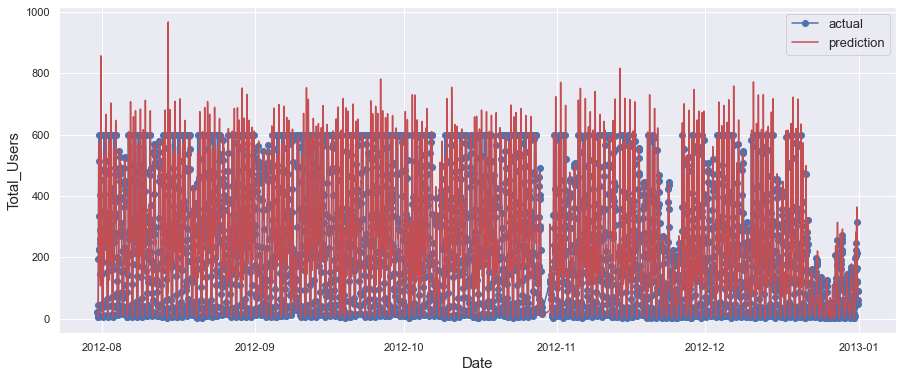

In [58]:
# plot actual value vs predicted
plt.figure(figsize=(15,6))
plt.plot(ts_test.index, inv_boxcox(ts_test,0.005), marker='o', label="actual")
plt.plot(ts_test.index, inv_boxcox(Predictions,0.005), 'r', label="prediction")
plt.ylabel('Total_Users', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()